**Data Analysis**\
This notebook is gathering visuals which might have been used for the paper, not all figures are final in this notebook please check related paper for final and important figures.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# ACC calculation over the various LLMS.
# Load your CSV file
file_path = "All_predictions_MajorityVote.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Accuracy Calculation Function
def calculate_accuracy(pred_column, true_column):
    correct_predictions = (df[pred_column] == df[true_column]).sum()
    total_predictions = len(df)
    return correct_predictions / total_predictions

# Calculate accuracy for each prediction column
Chatgpt_accuracy = calculate_accuracy('political_standpoint', 'Majority Vote')
gemma2_accuracy = calculate_accuracy('Gemma2 prediction', 'Majority Vote')
llama_accuracy = calculate_accuracy('Llama prediction', 'Majority Vote')

print(f"Chatgpt 3.5-Turbo-16k Accuracy: {Chatgpt_accuracy:.2f}")
print(f"Gemma2 Accuracy: {gemma2_accuracy:.2f}")
print(f"Llama Accuracy: {llama_accuracy:.2f}")

Chatgpt 3.5-Turbo-16k Accuracy: 0.88
Gemma2 Accuracy: 0.37
Llama Accuracy: 0.66


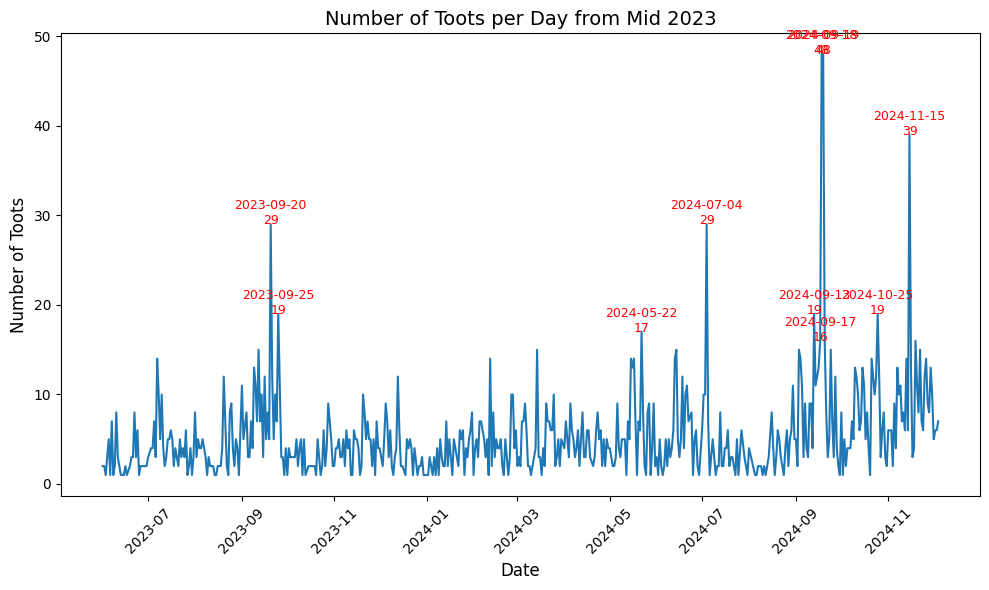

In [8]:
# Load the cleaned CSV file containing toots
df = pd.read_csv("All_predictions_MajorityVote.csv")

# Convert the 'DateTime' column to a datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter for toots starting from mid-2023 (e.g., June 1, 2023)
df_filtered = df[df['DateTime'] >= '2023-06-01']

# Count the number of toots per day
toots_per_day = df_filtered.groupby(df_filtered['DateTime'].dt.date).size()

# Plot the results
plt.figure(figsize=(10,6))
toots_per_day.plot(kind='line')

# Annotate the highest points
max_points = toots_per_day.nlargest(10)
for date, count in max_points.items():
    plt.text(date, count, f'{date}\n{count}', fontsize=9, ha='center', color='red')

# Set labels and title
plt.title('Number of Toots per Day from Mid 2023', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Toots', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# # Load the cleaned DataFrame (e.g., All_toots_cleaned.csv)
# all_toos_df = pd.read_csv('All_predictions_MajorityVote.csv')

# # Ensure the 'DateTime' column is in datetime format
# all_toos_df['DateTime'] = pd.to_datetime(all_toos_df['DateTime'])

# # Extract the date (or use another time period like month/year)
# all_toos_df['Date'] = all_toos_df['DateTime'].dt.date

# # Group by date and count the number of toots for each date
# toots_per_day = all_toos_df.groupby('Date').size()

# # Get the 10 highest points (top 10 dates with the highest number of toots)
# top_10_dates = toots_per_day.nlargest(10)

# # Plot the data
# plt.figure(figsize=(10, 6))
# toots_per_day.plot(kind='line', marker='o', color='b', label='Toots per day')

# # Highlight the top 10 points
# plt.scatter(top_10_dates.index, top_10_dates, color='red', zorder=5)

# # Annotate the top 10 points on the plot
# for date, count in top_10_dates.items():
#     plt.annotate(f'{date}\n{count}', 
#                  (date, count), 
#                  textcoords="offset points", 
#                  xytext=(0, 5), 
#                  ha='center', color='red')

# # Add labels and title
# plt.title('Number of Toots Written Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Toots')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()

# # Show the plot
# plt.show()

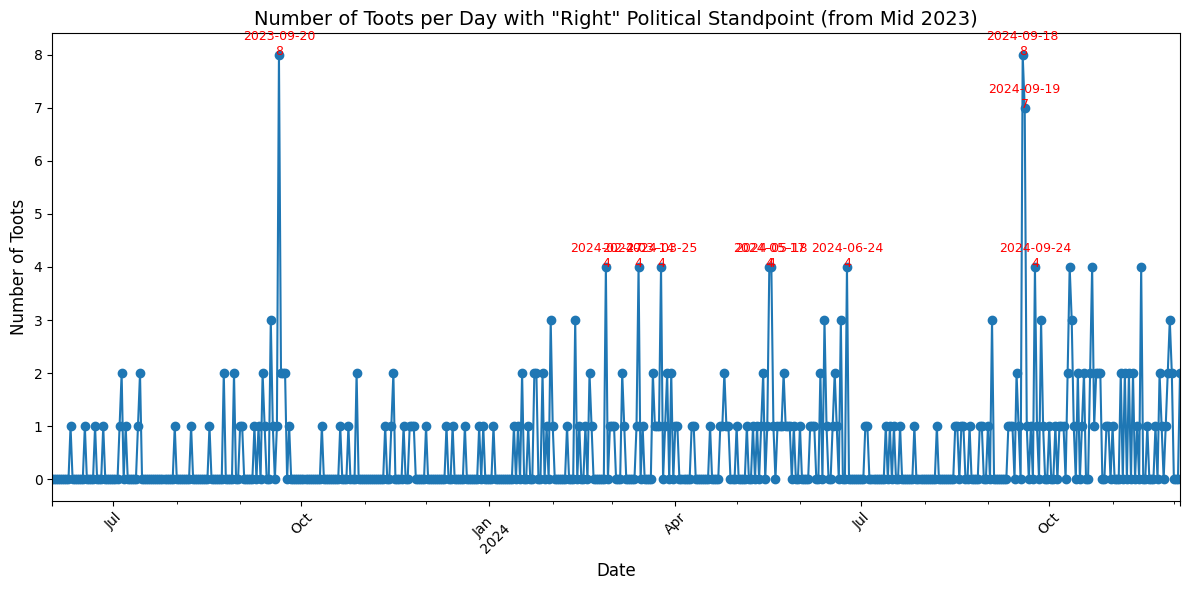

In [17]:
# Load the cleaned CSV file containing toots
df = pd.read_csv("All_predictions_MajorityVote.csv")

# Convert the 'DateTime' column to a datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter for toots starting from mid-2023 (e.g., June 1, 2023)
start_date = pd.to_datetime('2023-06-01')
end_date = df['DateTime'].max().date()
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the data for rows where 'political_standpoint' contains the word 'right'
df_filtered = df[df['DateTime'] >= start_date]
df_right = df_filtered[df_filtered['Majority Vote'].str.contains('rechts', case=False, na=False)]

# Count the number of toots per day for the filtered data
toots_per_day_right = df_right.groupby(df_right['DateTime'].dt.date).size()

# Align the counts with the full date range, filling missing dates with zeros
toots_per_day_right_full = toots_per_day_right.reindex(date_range, fill_value=0)

# Plot the results for 'right' political standpoint
plt.figure(figsize=(12, 6))
toots_per_day_right_full.plot(kind='line', marker='o')

# Annotate the highest points
max_points = toots_per_day_right_full.nlargest(10)
for date, count in max_points.items():
    plt.text(date, count, f'{date.date()}\n{count}', fontsize=9, ha='center', color='red')

# Set labels and title
plt.title('Number of Toots per Day with "Right" Political Standpoint (from Mid 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Toots', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

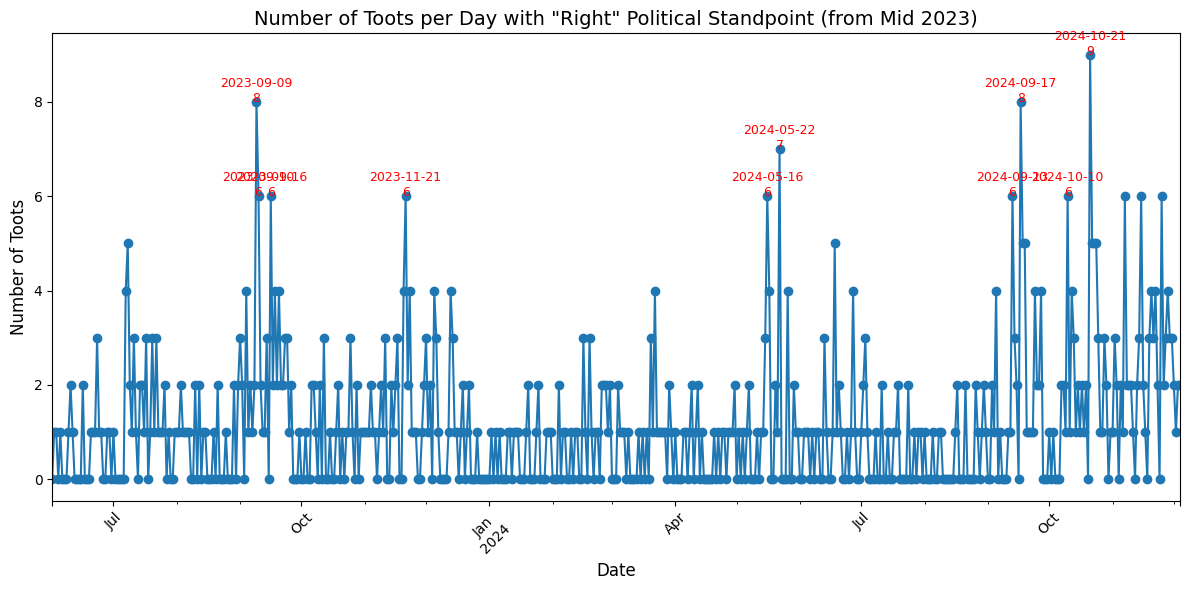

In [19]:
# Load the cleaned CSV file containing toots
df = pd.read_csv("All_predictions_MajorityVote.csv")

# Convert the 'DateTime' column to a datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter for toots starting from mid-2023 (e.g., June 1, 2023)
start_date = pd.to_datetime('2023-06-01')
end_date = df['DateTime'].max().date()
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the data for rows where 'political_standpoint' contains the word 'right'
df_filtered = df[df['DateTime'] >= start_date]
df_right = df_filtered[df_filtered['Majority Vote'].str.contains('links', case=False, na=False)]

# Count the number of toots per day for the filtered data
toots_per_day_right = df_right.groupby(df_right['DateTime'].dt.date).size()

# Align the counts with the full date range, filling missing dates with zeros
toots_per_day_right_full = toots_per_day_right.reindex(date_range, fill_value=0)

# Plot the results for 'right' political standpoint
plt.figure(figsize=(12, 6))
toots_per_day_right_full.plot(kind='line', marker='o')

# Annotate the highest points
max_points = toots_per_day_right_full.nlargest(10)
for date, count in max_points.items():
    plt.text(date, count, f'{date.date()}\n{count}', fontsize=9, ha='center', color='red')

# Set labels and title
plt.title('Number of Toots per Day with "Right" Political Standpoint (from Mid 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Toots', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Checking distribution of stances in the dataset.
# Load the cleaned CSV file containing toots
df = pd.read_csv("All_predictions_MajorityVote.csv")

# Group by the 'political_standpoint' column and count occurrences
standpoint_counts = df['Majority Vote'].value_counts()

# Display the counts
print(standpoint_counts)

Majority Vote
n/b                                                                             2145
links                                                                            808
rechts                                                                           323
midden                                                                           177
the political standpoint is 'left'.                                                1
the political standpoint is left.                                                  1
the political standpoint of the message is not clear from the given content.       1
Name: count, dtype: int64


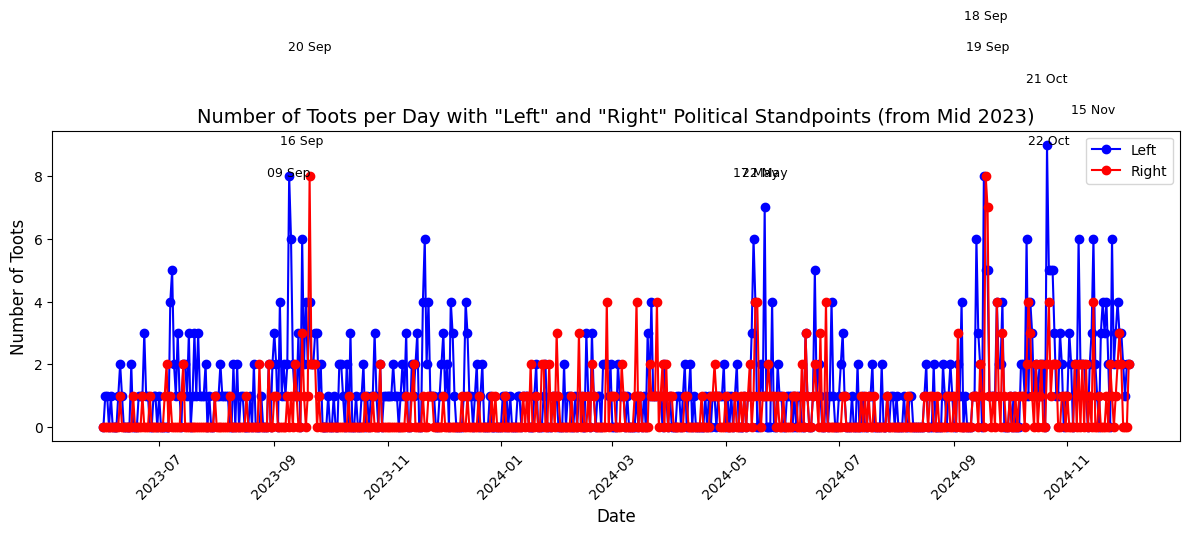

In [23]:
# Load the cleaned CSV file containing toots
df = pd.read_csv("All_predictions_MajorityVote.csv")

# Convert the 'DateTime' column to a datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter for toots starting from mid-2023 (e.g., June 1, 2023)
start_date = pd.to_datetime('2023-06-01')
end_date = df['DateTime'].max().date()
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the data for 'left' and 'right' political standpoints
df_filtered = df[df['DateTime'] >= start_date]
df_left = df_filtered[df_filtered['Majority Vote'].str.contains('links', case=False, na=False)]
df_right = df_filtered[df_filtered['Majority Vote'].str.contains('rechts', case=False, na=False)]

# Count the number of toots per day for each standpoint
toots_per_day_left = df_left.groupby(df_left['DateTime'].dt.date).size()
toots_per_day_right = df_right.groupby(df_right['DateTime'].dt.date).size()

# Align the counts with the full date range, filling missing dates with zeros
toots_per_day_left_full = toots_per_day_left.reindex(date_range, fill_value=0)
toots_per_day_right_full = toots_per_day_right.reindex(date_range, fill_value=0)

# Plot the results for 'left' and 'right' political standpoints
plt.figure(figsize=(12, 6))

# Plotting 'left' toots in blue
plt.plot(toots_per_day_left_full.index, toots_per_day_left_full, label='Left', color='blue', marker='o')

# Plotting 'right' toots in red
plt.plot(toots_per_day_right_full.index, toots_per_day_right_full, label='Right', color='red', marker='o')

# Annotate the top 10 dates with the most toots across both categories
all_counts = toots_per_day_left_full.add(toots_per_day_right_full, fill_value=0)
top_10_dates = all_counts.nlargest(10)

for date, _ in top_10_dates.items():
    # Annotate with day and month only
    plt.text(date, all_counts[date], date.strftime('%d %b'), fontsize=9, ha='center', color='black')

# Set labels, legend, and title
plt.title('Number of Toots per Day with "Left" and "Right" Political Standpoints (from Mid 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Toots', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

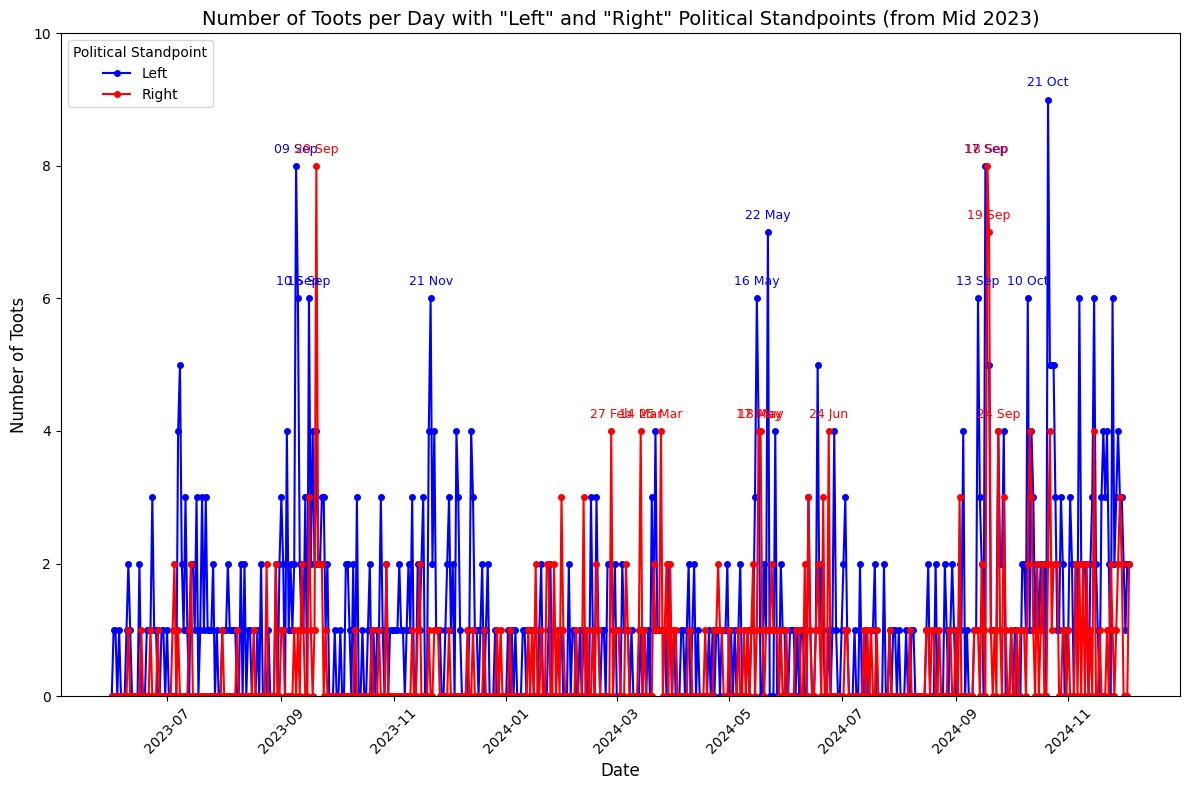

In [26]:
# Generate a complete date range from the earliest to the latest date specified and returns most communications days as well.
date_range = pd.date_range(start=df_filtered['DateTime'].dt.date.min(), 
                           end=df_filtered['DateTime'].dt.date.max())

# Reindex the 'left' and 'right' counts to include all dates in the range, filling missing dates with 0
toots_per_day_left = toots_per_day_left.reindex(date_range, fill_value=0)
toots_per_day_right = toots_per_day_right.reindex(date_range, fill_value=0)

# Annotate the 10 highest points for each category
max_points_left = toots_per_day_left.nlargest(10)
max_points_right = toots_per_day_right.nlargest(10)

# Plot the results for both standpoints
plt.figure(figsize=(12, 8))
plt.plot(toots_per_day_left.index, toots_per_day_left.values, color='blue', label='Left', marker='o', markersize=4, linestyle='-')
plt.plot(toots_per_day_right.index, toots_per_day_right.values, color='red', label='Right', marker='o', markersize=4, linestyle='-')

# Annotate points for left
for date, count in max_points_left.items():
    plt.text(date, count + 0.2, date.strftime('%d %b'), fontsize=9, ha='center', color='blue')

# Annotate points for right
for date, count in max_points_right.items():
    plt.text(date, count + 0.2, date.strftime('%d %b'), fontsize=9, ha='center', color='red')

# Set Y-axis to start at 0
plt.ylim(0, max(toots_per_day_left.max(), toots_per_day_right.max()) + 1)

# Set labels and title
plt.title('Number of Toots per Day with "Left" and "Right" Political Standpoints (from Mid 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Toots', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Political Standpoint")
plt.tight_layout()

# fig = plt.figure(figsize=(6, 12))
plt.savefig('V1.png', dpi=100)
# Show the plot
plt.show()


In [36]:

# T-test script for toots that are before and after cabinet fall left and right wing comparison.
# Load the data
df = pd.read_csv("All_predictions_MajorityVote.csv")

# Define the cabinet change date
cabinet_change_date = pd.Timestamp('2024-07-02')

# Ensure DateTime is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Add a period column: 'before' or 'after' the cabinet change
df['period'] = df['DateTime'].apply(lambda x: 'before' if x < cabinet_change_date else 'after')

# Separate messages by political affiliation
left_wing = df[df['Majority Vote'] == 'links']
right_wing = df[df['Majority Vote'] == 'rechts']

# Calculate daily message counts for left-wing before and after
left_before = left_wing[left_wing['DateTime'] < cabinet_change_date]
left_after = left_wing[left_wing['DateTime'] >= cabinet_change_date]
left_before_daily = left_before.groupby(left_before['DateTime'].dt.date).size()
left_after_daily = left_after.groupby(left_after['DateTime'].dt.date).size()

# Calculate daily message counts for right-wing before and after
right_before = right_wing[right_wing['DateTime'] < cabinet_change_date]
right_after = right_wing[right_wing['DateTime'] >= cabinet_change_date]
right_before_daily = right_before.groupby(right_before['DateTime'].dt.date).size()
right_after_daily = right_after.groupby(right_after['DateTime'].dt.date).size()

# Perform t-tests on daily counts
left_ttest = stats.ttest_ind(left_before_daily, left_after_daily, equal_var=False)
right_ttest = stats.ttest_ind(right_before_daily, right_after_daily, equal_var=False)

# Calculate total toots for each group
left_before_count = len(left_before)
left_after_count = len(left_after)
right_before_count = len(right_before)
right_after_count = len(right_after)

# Print results
print(f"Left-wing t-test p-value: {left_ttest.pvalue}")
print(f"Right-wing t-test p-value: {right_ttest.pvalue}")
print()
print(f"Before cabinet change (left): {left_before_count}")
print(f"After cabinet change (left): {left_after_count}")
print(f"Before cabinet change (right): {right_before_count}")
print(f"After cabinet change (right): {right_after_count}")


Left-wing t-test p-value: 0.0006434068867460424
Right-wing t-test p-value: 0.151174151687501

Before cabinet change (left): 573
After cabinet change (left): 235
Before cabinet change (right): 208
After cabinet change (right): 115
